In [3]:
import sympy as sy
from sympy import *
mm=0.001

知识重点
---
1. $P_{临界}=\frac{\pi^2EI}{L_e^2}$

题目列表（都比较简单）
---
1. 选择题
2. 计算题
3. 计算题
4. 计算题
5. 计算题

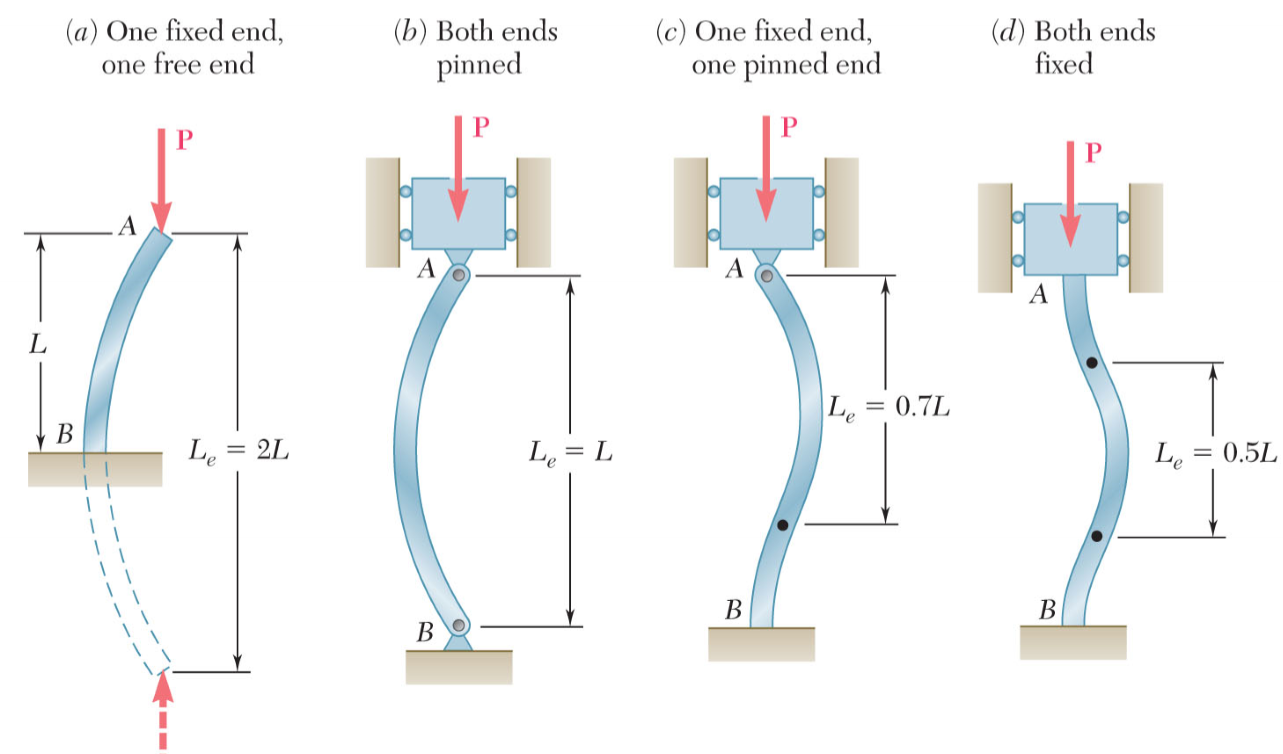

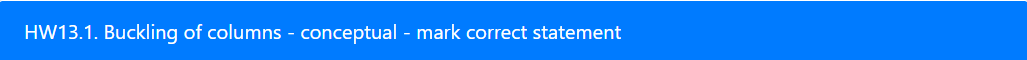

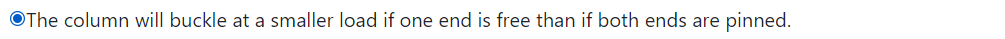

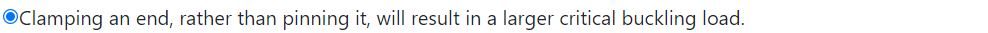

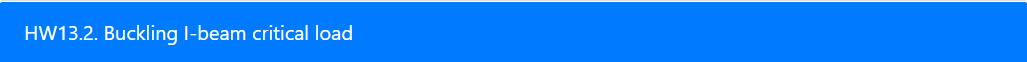

**计算$I$，不同固定方式的$P_{临界}$**

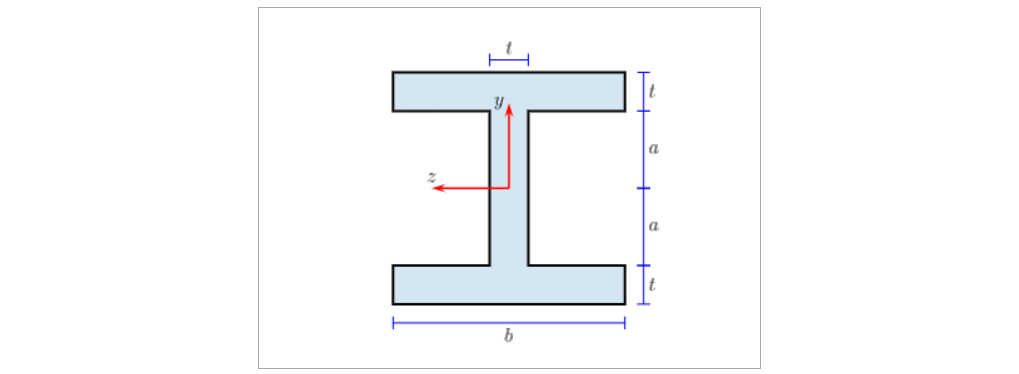

In [15]:
E = 300 # MPa
L = 1699 # mm
t = 28 # mm
a = 84 # mm
b = 140 # mm
##################复制部分
E*=1e6
L*=mm
t*=mm
a*=mm
b*=mm
##################单位转化
r=S('r')

I1=integrate(t*r*r,[r,-a,a])
I2=integrate(b*r*r,[r,a,a+t])*2
I=I1+I2

Le1=L
Le2=2.0*L
Le3=0.7*L
Le4=0.5*L

Pcr1=pi**2*E*I/Le1**2
Pcr2=pi**2*E*I/Le2**2
Pcr3=pi**2*E*I/Le3**2
Pcr4=pi**2*E*I/Le4**2 

I/1e6/mm**4,float(Pcr1/1000),float(Pcr2/1000),float(Pcr3/1000),float(Pcr4/1000)

(86.8713813333333,
 89.10682503777059,
 22.276706259442648,
 181.85066334238897,
 356.42730015108236)

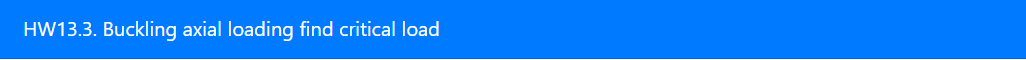

**计算不会使 $BD$ 产生屈曲的最大 $P$**

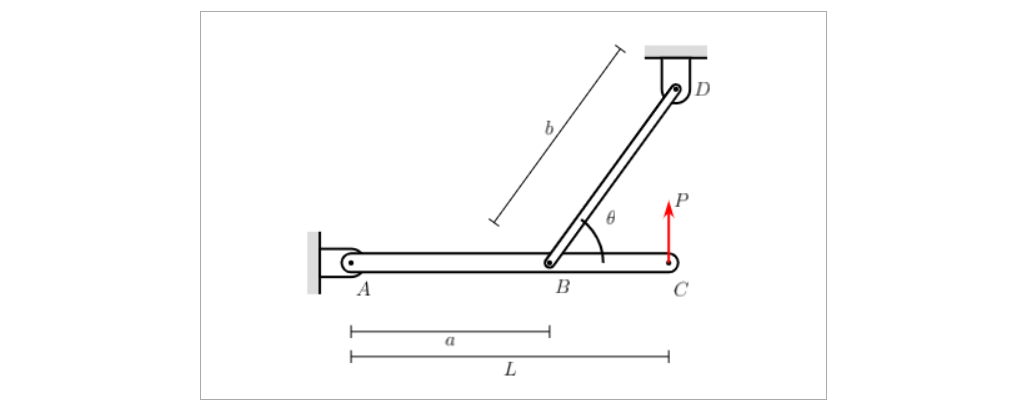

In [30]:
L = 1055 # mm
a = 634 # mm
b = 538 # mm
E = 172 # GPa
d = 16 # mm
theta = 34 # degrees
##########################复制部分
L*=mm
a*=mm
b*=mm
E*=1e9
d*=mm
r=d/2
theta=theta*pi/180
##########################单位转化
#①计算临界条件
Iz=(pi*d**4)/64
Le=b  
P临界=pi**2*E*Iz/Le**2

#②计算P
P=P临界*sin(theta)*a/L

float(P)/1000

6.3403308366119076

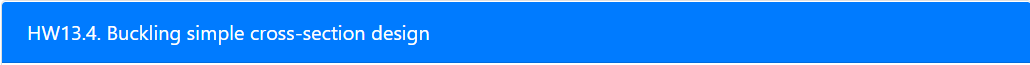

注意 $P_{临界}=P \cdot FS$
---

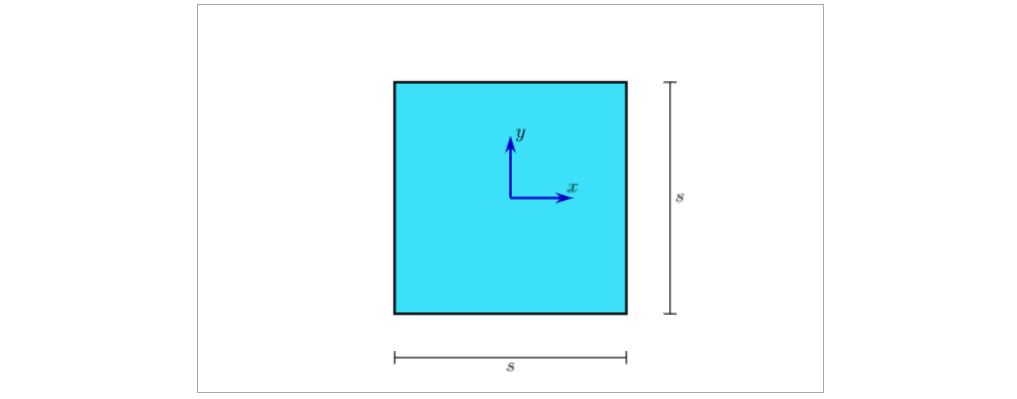

In [1]:
from sympy import *

P = 449 # N
L = 2.984 # m
E = 198 # GPa
FS = 2.6
################复制部分
E*=1e9
################单位转化
s,d,r=S('s,d,r')

key=int(input('圆是1，方是2'))
key2=input('Pin-Pin=1，Fix-Fix=2,Fix-Free=3')

if key==1:
    Iz=(pi*d**4)/64
elif key==2:
    Iz=integrate(s*r*r,[r,-0.5*s,0.5*s])

if key2=='1':
    Le=L
elif key2=='2':
    Le=L/2
elif key2=='3':
    Le=2*L
    
P临界=pi**2*E*Iz/Le**2

if key==1:
    print(solve([P临界-P*FS],[d])[1][0])
elif key==2:
    print(solve([P临界-P*FS],[s])[1][0])

0.0128293787092124


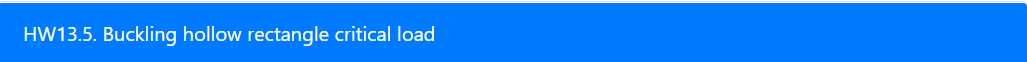

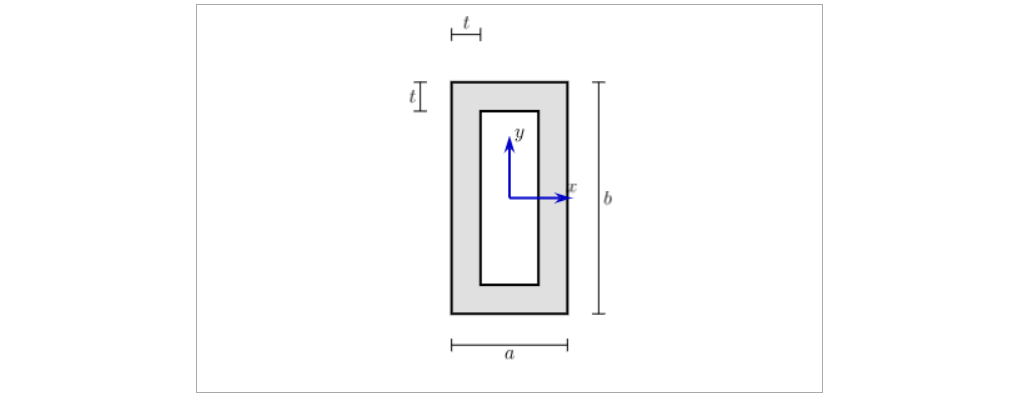

In [7]:
from sympy import *

E = 214 # MPa
L = 4.007 # m
t = 21 # mm
a = 88 # mm
b = 141 # mm
##################复制部分
mm=1e-3

E*=1e6
t*=mm
a*=mm
b*=mm
##################单位转化
r=S('r')
Ix1=integrate(a*r*r,[r,-0.5*b,0.5*b])
Ix2=integrate((a-t-t)*r*r,[r,-(0.5*b-t),0.5*b-t])
Ix=Ix1-Ix2

Iy1=integrate(b*r*r,[r,-0.5*a,0.5*a])
Iy2=integrate((b-t-t)*r*r,[r,-(0.5*a-t),0.5*a-t])
Iy=Iy1-Iy2

Le=L*0.7

P临界1=pi**2*E*Ix/Le**2
P临界2=pi**2*E*Iy/Le**2

#float(min(P临界1,P临界2))/1000
float(P临界1)/1000

4.520179744639722